In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!cd  /content/drive/MyDrive/AI_final_project
!ls

drive  sample_data


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_final_project/最終dataset/20_mapped_data.csv")
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Text,Index
0,"['一次', '三週年', '甜點', '盤']",11
1,"['一樣', '好吃']",14
2,"['想當初', '他們', '剛', '開時', '大二', '中間', '疫情']",9
3,"['現在', '畢業', '迎來', '他們', '第三年', '特別', '有感']",14
4,"['抹', '心悸', '好吃']",5
5,"['抹', '心悸', '好吃']",9
6,"['口感', '軟偏', '紮實', '搭', '上', '順口', '濃抹', '鮮奶油'...",9
7,"['微甜', '不膩', '輕柔', '口感', '流連忘返']",5
8,"['搜尋', '地區', '甜食', '吃', '中山', '國', '中']",4
9,"['搜尋', '種類', '甜食', '吃', '千層']",4


### Over-sampling data

In [ ]:
X = df["Text"].values
y = df["Index"].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [ ]:
X = X.reshape(-1,)
X.shape

(86120,)

### Tokenization

In [ ]:
import ast
tokenized_sentences = []
for sentence in X:
  actual_list = ast.literal_eval(sentence)
  tokenized_sentences.append(actual_list)

print("Tokenized Sentences (first 10 sentences with stopwords removed):")
for i, sentence in enumerate(tokenized_sentences[:10]):
    print(sentence)

Tokenized Sentences (first 10 sentences with stopwords removed):
['一次', '三週年', '甜點', '盤']
['一樣', '好吃']
['想當初', '他們', '剛', '開時', '大二', '中間', '疫情']
['現在', '畢業', '迎來', '他們', '第三年', '特別', '有感']
['抹', '心悸', '好吃']
['抹', '心悸', '好吃']
['口感', '軟偏', '紮實', '搭', '上', '順口', '濃抹', '鮮奶油', '絕配']
['微甜', '不膩', '輕柔', '口感', '流連忘返']
['搜尋', '地區', '甜食', '吃', '中山', '國', '中']
['搜尋', '種類', '甜食', '吃', '千層']


In [ ]:
from keras.preprocessing.text import Tokenizer

# 將分詞結果轉換為文本形式，以便 Tokenizer 使用
tokenized_texts = [" ".join(sentence) for sentence in tokenized_sentences]

# 初始化 Tokenizer 並擬合文本數據
tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(tokenized_texts) #字按照頻率排序會計算文本數據中每個詞語的出現頻率，並基於這些頻率構建一個詞彙表。這個詞彙表可以用來將文本轉換為數字序列。

print("Text \n",tokenized_texts[:10],'\n')

# 將文本轉換為數字序列
X_seqs = tokenizer.texts_to_sequences(tokenized_texts)
# 打印數字序列
print("Sequences:")
X_seqs[:10]

Text 
 ['一次 三週年 甜點 盤', '一樣 好吃', '想當初 他們 剛 開時 大二 中間 疫情', '現在 畢業 迎來 他們 第三年 特別 有感', '抹 心悸 好吃', '抹 心悸 好吃', '口感 軟偏 紮實 搭 上 順口 濃抹 鮮奶油 絕配', '微甜 不膩 輕柔 口感 流連忘返', '搜尋 地區 甜食 吃 中山 國 中', '搜尋 種類 甜食 吃 千層'] 

Sequences:


[[76, 7980, 950, 7457],
 [119, 48],
 [7458, 175, 2957, 5034, 10070, 3807, 2182],
 [58, 420, 1943, 175, 5335, 96, 1892],
 [228, 6032, 48],
 [228, 6032, 48],
 [337, 10947, 10948, 282, 50, 2087, 10071, 10949, 4582],
 [10072, 4804, 4354, 337, 10073],
 [541, 1013, 493, 18, 2681, 3420, 64],
 [541, 1014, 493, 18, 5336]]

In [ ]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,21):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> 想
Index:  2 ----> 一起
Index:  3 ----> 真的
Index:  4 ----> 活動
Index:  5 ----> 喜歡
Index:  6 ----> 參加
Index:  7 ----> 信箱
Index:  8 ----> 友愛
Index:  9 ----> 發
Index:  10 ----> 奶昔
Index:  11 ----> 大哥
Index:  12 ----> 看
Index:  13 ----> 打
Index:  14 ----> 邊吃麥
Index:  15 ----> 當當邊
Index:  16 ----> 影片
Index:  17 ----> 不
Index:  18 ----> 吃
Index:  19 ----> 你們
Index:  20 ----> 自己


In [ ]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 18101


padding (把seqence轉成一樣長度)

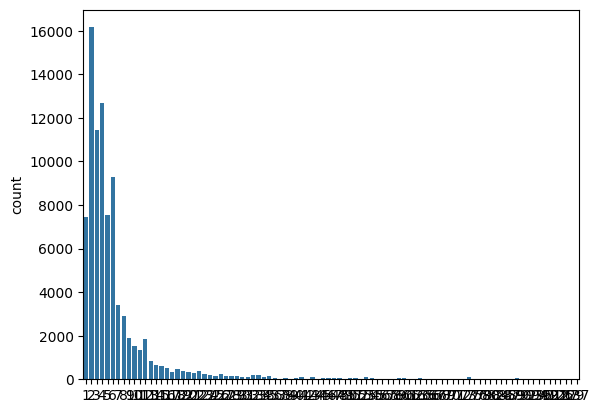

In [ ]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [ ]:
max(lens)

137

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_len=140
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[79, 8682, 939, 8101]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   79 8682  939 8101]]


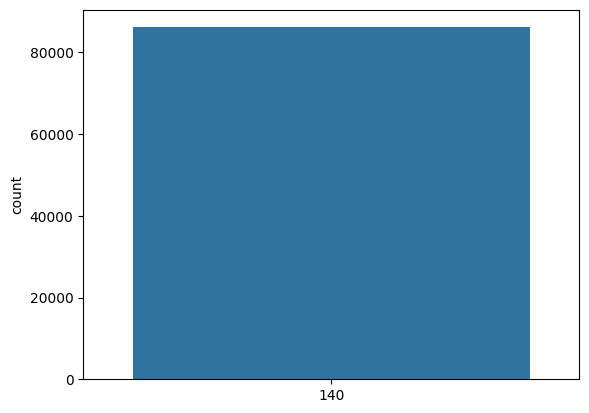

In [ ]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.2, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (68896, 140)
Training y Dim  (68896,)
Test X Dim  (17224, 140)
Test y Dim  (17224,)


### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=20

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 20)            350180    
                                                                 
 lstm (LSTM)                 (None, 40, 80)            32320     
                                                                 
 dropout (Dropout)           (None, 40, 80)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
Total params: 402680 (1.54 MB)
Trainable params: 402680 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=128
epochs = 20


Epoch 1/20
369/369 [==============================] - 84s 203ms/step - loss: 2.6541 - accuracy: 0.1780 - val_loss: 2.1045 - val_accuracy: 0.3675
Epoch 2/20
369/369 [==============================] - 78s 211ms/step - loss: 1.8936 - accuracy: 0.4204 - val_loss: 1.6209 - val_accuracy: 0.5067
Epoch 3/20
369/369 [==============================] - 69s 187ms/step - loss: 1.5554 - accuracy: 0.5255 - val_loss: 1.4203 - val_accuracy: 0.5747
Epoch 4/20
369/369 [==============================] - 69s 186ms/step - loss: 1.3920 - accuracy: 0.5738 - val_loss: 1.3272 - val_accuracy: 0.6047
Epoch 5/20
369/369 [==============================] - 54s 147ms/step - loss: 1.2920 - accuracy: 0.6088 - val_loss: 1.2616 - val_accuracy: 0.6278
Epoch 6/20
369/369 [==============================] - 51s 139ms/step - loss: 1.2203 - accuracy: 0.6356 - val_loss: 1.2143 - val_accuracy: 0.6400
Epoch 7/20
369/369 [==============================] - 58s 156ms/step - loss: 1.1647 - accuracy: 0.6544 - val_loss: 1.1794 - val_ac

In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

93/93 [==============================] - 4s 41ms/step - loss: 1.0548 - accuracy: 0.7028


[1.0548404455184937, 0.7027806043624878]

### Bidirectional-LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 140
embed_len=128


model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 128)          2317056   
                                                                 
 bidirectional (Bidirection  (None, 140, 160)          133760    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 140, 160)          154240    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 160)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=64
epochs = 15

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs,
          shuffle=True,validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/15
 177/1077 [===>..........................] - ETA: 15:45 - loss: 2.7767 - accuracy: 0.1394

In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

NameError: name 'model' is not defined

### Mapping

In [ ]:
emoji_raw = open('/content/drive/MyDrive/AI_final_project/最終dataset/20_mapping_emojis.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    sentence = sentence.rstrip()
    emojis.append(sentence)


emoji_dict={}

for e in emojis:
    idx = int(e.split()[0])
    emoji = e.split()[1]
    emoji_dict[idx] = emoji

In [ ]:
emoji_dict

{0: '😍',
 1: '❤',
 2: '😂',
 3: '🔥',
 4: '🏻',
 5: '🤣',
 6: '🙌',
 7: '💜',
 8: '😢',
 9: '\U0001f979',
 10: '🐦',
 11: '✨',
 12: '👏',
 13: '📍',
 14: '😭',
 15: '💌',
 16: '🥺',
 17: '😆',
 18: '👍',
 19: '💙'}

In [ ]:
model.save('/content/drive/MyDrive/AI_final_project/20BLSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import jieba
jieba.set_dictionary('/content/drive/MyDrive/AI_final_project/dict.txt.big.txt')

def get_stopwords(file):
    stopword_list = []
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            stopword_list.append(line)
    return stopword_list

def remove_stopwords(sentence, stopwords):
    return [word for word in sentence if word not in stopwords and word.strip()]

stopwords = get_stopwords('/content/drive/MyDrive/AI_final_project/stopwords.txt')

def preprocess_text(X):
    tokenized_sentences = []
    for sentence in X:
      words = list(jieba.cut(sentence))
      filtered_words = remove_stopwords(words, stopwords)
      tokenized_sentences.append(filtered_words)
    tokenized_texts = [" ".join(sentence) for sentence in tokenized_sentences]

    max_len=140
    X_seqs = tokenizer.texts_to_sequences(tokenized_texts)
    X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)
    return X_seqs_pd

In [ ]:
def predict_emoji(text):
    X_sequences = preprocess_text([text])
    predictions = np.argmax(model.predict(X_sequences), axis=1)
    emoji_idx = predictions[0]
    emoji = emoji_dict[emoji_idx]

    return emoji

In [ ]:
text = input("Enter text\n\n")

print("\n\nEmojified Text\n\n")
print(text + " " + predict_emoji(text))

In [ ]:
paragraph = '''
近期（2024年3月直至今日），連續的食安風暴襲捲了臺灣及日本兩地，大至蘇丹紅色素案、寶林茶室中毒案、小林製藥紅麴產品汙染事件等，小至遍及全台各地的食品中毒事件，無不讓整體社會人心惶惶，甚至產生下列之疑惑：我們要如何確定生活中所吃到的任何食物（食品）都是安全的呢？食安相關規定又是如何為國人健康把關？以下筆者便會以上述所列之食安事件為例，除了為各位讀者簡述引發該案之緣由，更針對其涉及之食安規定、準則等做詳述及討論，讓大家能更認識食安的整體相關運作體系。

'''

In [ ]:
paragraph = input("Enter text\n\n")

In [ ]:
import re
def emojify_paragraph(paragraph):
    # 按行分割输入段落
    lines = re.split(r'[\n，。]', paragraph)
    emojified_lines = []

    # 逐行处理每一行
    for line in lines:
        if line.strip():  # 如果行非空
            emojified_line = line + predict_emoji(line)
            emojified_lines.append(emojified_line)
        else:
            emojified_lines.append(line)

    # 重新组合成一个段落
    emojified_paragraph = '\n'.join(emojified_lines)
    return emojified_paragraph

print(paragraph+'\n')
print(emojify_paragraph(paragraph))


### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
report = classification_report(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
print(report)

In [ ]:
plt.figure(figsize=(15,15))
mat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(mat, annot=True)
plt.show()

### Save model

In [ ]:
model.save('/content/drive/MyDrive/emoji_test/emoji_model.h5', save_format='h5')

In [ ]:
!pip install flask pyngrok

In [ ]:
from flask import Flask, request, render_template
from pyngrok import ngrok

app = Flask(__name__)

# 创建一个简单的主页
@app.route("/", methods=["GET", "POST"])
def home():
    if request.method == "POST":
        text = request.form["text"]
        # 这里可以调用您的预测函数
        result = text + " 😍"  # 示例结果
        return render_template("index.html", result=result)
    return render_template("index.html", result="")

# 创建一个 index.html 文件
!mkdir -p templates
with open("templates/index.html", "w") as file:
    file.write('''
        <!doctype html>
        <title>Emoji Predictor</title>
        <h1>Enter Text to Predict Emoji</h1>
        <form method=post>
            <textarea name=text rows=4 cols=40></textarea>
            <br><br>
            <input type=submit value=Predict>
        </form>
        <h2>Result: {{ result }}</h2>
    ''')

# 启动 ngrok 隧道
public_url = ngrok.connect(port=5000)
print("Public URL:", public_url)

# 启动 Flask 应用
app.run(port=5000)
